In [1]:
from fastMONAI.vision_all import *

from monai.apps import DecathlonDataset
from sklearn.model_selection import train_test_split
import pandas as pd

C:\Users\Eirik\anaconda3\envs\raskmonai\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (None)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


In [2]:
path = Path('..\data')
path.mkdir(exist_ok=True)

In [3]:
PancreasSet = DecathlonDataset(root_dir=path, task="Task07_Pancreas", section="training", download=False,
                                 cache_num=0, num_workers=3)

In [4]:
df = pd.DataFrame(PancreasSet.data)


In [5]:
df.head()

,image,label
0,..\data\Task07_Pancreas\imagesTr\pancreas_043.nii.gz,..\data\Task07_Pancreas\labelsTr\pancreas_043.nii.gz
1,..\data\Task07_Pancreas\imagesTr\pancreas_262.nii.gz,..\data\Task07_Pancreas\labelsTr\pancreas_262.nii.gz
2,..\data\Task07_Pancreas\imagesTr\pancreas_347.nii.gz,..\data\Task07_Pancreas\labelsTr\pancreas_347.nii.gz
3,..\data\Task07_Pancreas\imagesTr\pancreas_362.nii.gz,..\data\Task07_Pancreas\labelsTr\pancreas_362.nii.gz
4,..\data\Task07_Pancreas\imagesTr\pancreas_421.nii.gz,..\data\Task07_Pancreas\labelsTr\pancreas_421.nii.gz


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   225 non-null    object
 1   label   225 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


In [7]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)
train_df.shape, test_df.shape

((202, 2), (23, 2))

In [8]:
med_dataset = MedDataset(img_list=train_df.label.tolist()[:20], dtype=MedMask, max_workers=12)

In [9]:
med_dataset.df.head()

,path,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,voxel_count_0,voxel_count_1,voxel_count_2
0,..\data\Task07_Pancreas\labelsTr\pancreas_077.nii.gz,512,512,81,0.8984,0.8984,2.5,RAS+,21183489,44353,5822
1,..\data\Task07_Pancreas\labelsTr\pancreas_300.nii.gz,512,512,85,0.8672,0.8672,2.5,RAS+,22239536,40522,2182
2,..\data\Task07_Pancreas\labelsTr\pancreas_264.nii.gz,512,512,109,0.8379,0.8379,2.5,RAS+,28545735,23049,4912
3,..\data\Task07_Pancreas\labelsTr\pancreas_302.nii.gz,512,512,83,0.9473,0.9473,2.5,RAS+,21702530,53798,1624
4,..\data\Task07_Pancreas\labelsTr\pancreas_404.nii.gz,512,512,105,0.8789,0.8789,2.5,RAS+,27492313,31535,1272


In [10]:
summary_df = med_dataset.summary()

In [11]:
summary_df

,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,example_path,total
0,512,512,43,0.9766,0.9766,5.0,RAS+,..\data\Task07_Pancreas\labelsTr\pancreas_296.nii.gz,1
1,512,512,73,0.6445,0.6445,2.5,RAS+,..\data\Task07_Pancreas\labelsTr\pancreas_204.nii.gz,1
18,512,512,109,0.8594,0.8594,2.5,RAS+,..\data\Task07_Pancreas\labelsTr\pancreas_376.nii.gz,1
17,512,512,109,0.8379,0.8379,2.5,RAS+,..\data\Task07_Pancreas\labelsTr\pancreas_264.nii.gz,1
16,512,512,107,0.9668,0.9668,2.5,RAS+,..\data\Task07_Pancreas\labelsTr\pancreas_400.nii.gz,1
15,512,512,105,0.8789,0.8789,2.5,RAS+,..\data\Task07_Pancreas\labelsTr\pancreas_404.nii.gz,1
14,512,512,103,0.8223,0.8223,2.5,RAS+,..\data\Task07_Pancreas\labelsTr\pancreas_067.nii.gz,1
13,512,512,101,0.8711,0.8711,2.5,RAS+,..\data\Task07_Pancreas\labelsTr\pancreas_242.nii.gz,1
12,512,512,97,0.8984,0.8984,2.5,RAS+,..\data\Task07_Pancreas\labelsTr\pancreas_266.nii.gz,1
11,512,512,95,0.7793,0.7793,2.5,RAS+,..\data\Task07_Pancreas\labelsTr\pancreas_309.nii.gz,1


In [12]:
resample, reorder = med_dataset.suggestion()
resample, reorder

([0.8984, 0.8984, 2.5], False)

In [13]:
img_size = med_dataset.get_largest_img_size(resample=resample)
img_size

[557.0, 557.0, 188.0]

In [25]:
item_tfms = [ZNormalization(), PadOrCrop([128,128,480]), RandomAffine(scales=0, degrees=5, isotropic=True)] 

In [26]:
dblock = MedDataBlock(blocks=(ImageBlock(cls=MedImage), MedMaskBlock), 
                      splitter=RandomSplitter(seed=42),
                      get_x=ColReader('image'),
                      get_y=ColReader('label'),
                      item_tfms=item_tfms,
                      batch_tfms=None,
                      reorder=reorder,
                      resample=resample)

In [27]:
bs=1
dls = dblock.dataloaders(train_df, bs=bs)

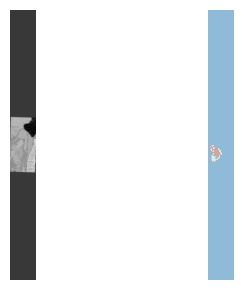

In [28]:
dls.show_batch(anatomical_plane=0, unique=True)

In [29]:
len(dls.train_ds.items), len(dls.valid_ds.items)

(162, 40)

In [30]:
from monai.networks.nets import UNet
from monai.losses import DiceCELoss

In [31]:
codes = np.unique(med_img_reader(train_df.label.tolist()[0]))
n_classes = len(codes)

In [32]:
codes, n_classes

(array([0., 1., 2.], dtype=float32), 3)

In [33]:
model = UNet(dimensions=3, in_channels=1, out_channels=n_classes, 
             channels=(16, 32, 64, 128, 256),strides=(2, 2, 2, 2), 
             num_res_units=2)

C:\Users\Eirik\anaconda3\envs\raskmonai\lib\site-packages\monai\utils\deprecate_utils.py:219: FutureWarning: monai.networks.nets.unet UNet.__init__:dimensions: Argument `dimensions` has been deprecated since version 0.6. Please use `spatial_dims` instead.
  warn_deprecated(argname, msg, warning_category)


In [34]:
loss_func = CustomLoss(loss_func=DiceCELoss(to_onehot_y=True, include_background=True, softmax=True))

In [35]:
learn = Learner(dls, model, loss_func=loss_func, opt_func=ranger, metrics=multi_dice_score)

In [36]:
lr = learn.lr_find()#.to_fp16()

KeyboardInterrupt: 

In [ ]:
epochs = 4

In [ ]:
learn.fit_flat_cos(epochs, lr)

In [ ]:
learn.save('baseline.pancreas-model')

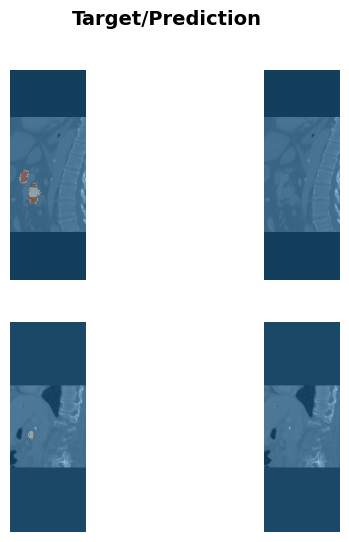

In [29]:
learn.show_results(anatomical_plane=0, ds_idx=1)

In [30]:
test_dl = learn.dls.test_dl(test_df,with_labels=True)

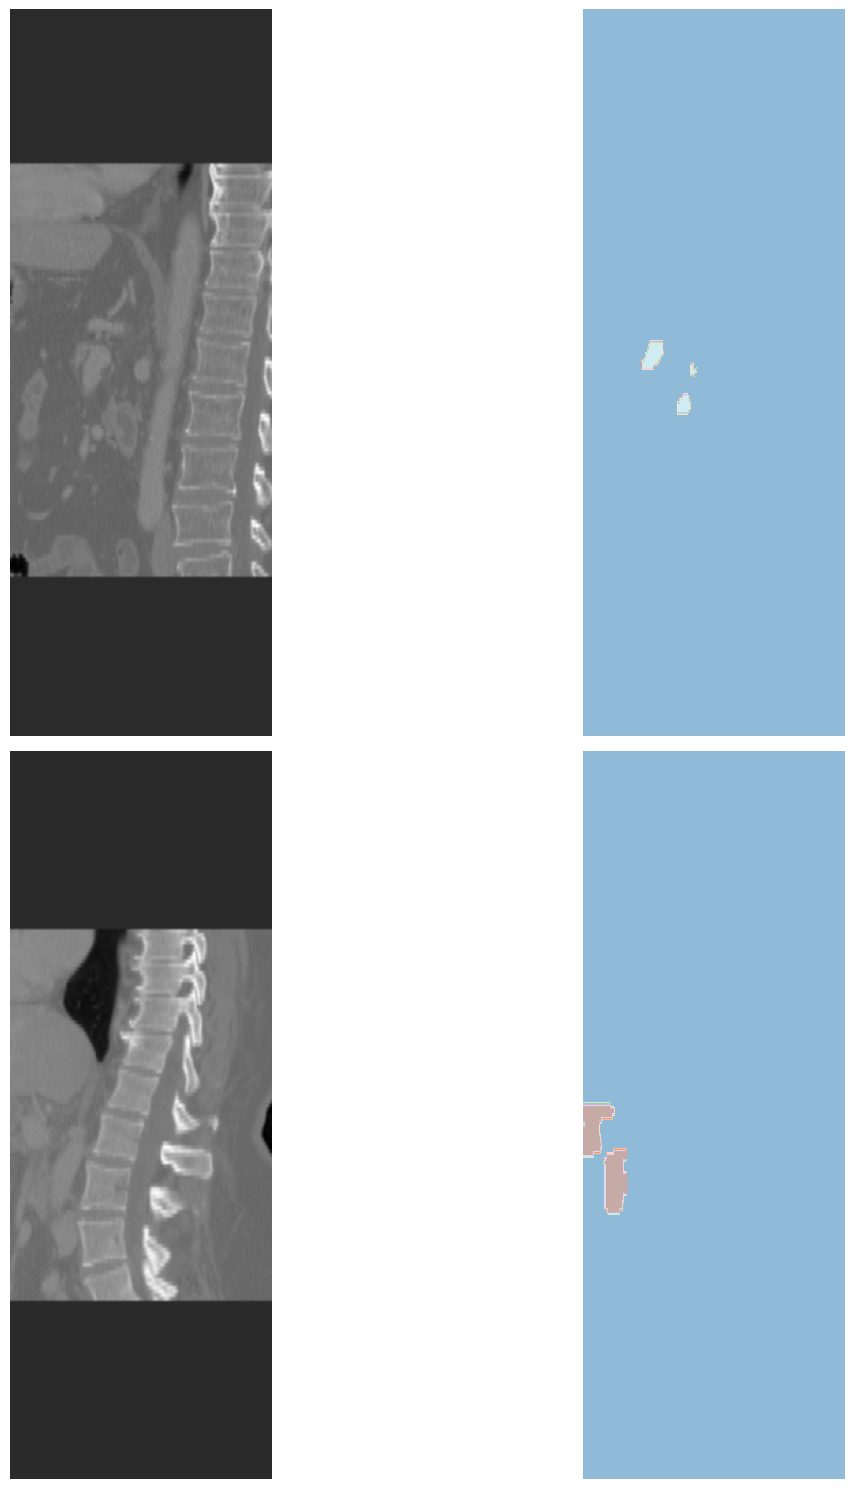

In [31]:
test_dl.show_batch(anatomical_plane=0, figsize=(15,15))

In [32]:
pred_acts, labels = learn.get_preds(dl=test_dl)
pred_acts.shape, labels.shape

(torch.Size([23, 3, 288, 192, 192]), torch.Size([23, 1, 288, 192, 192]))

In [33]:
multi_dice_score(pred_acts, labels)

tensor([0.0335, 0.0000])

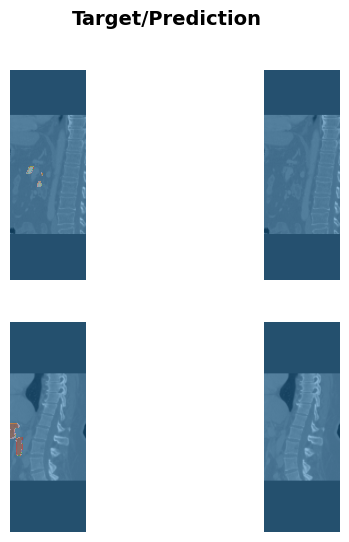

In [34]:
learn.show_results(anatomical_plane=0, dl=test_dl, ds_idx=19)

In [35]:
learn.export('baseline_pancreas_model.pkl')